In [1]:
%matplotlib widget

import numpy as np
from scipy import optimize
from matplotlib import colors, cm
import matplotlib.pyplot as plt

from comp_inhib_wc import dxdt_v2, jacobian, sim_dev, plot_sim_dev

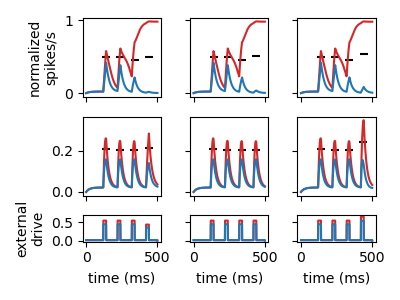

In [2]:
# for final figures!!!!

dev = 0.2  # change in proportion of original injected excitation

w_ii, w_ij, w_ii_l2, w_ij_l2, w_fb = [1., -0.33840608, 0.2270948, -0.2, -1.]

tau = 20
tau_2 = 20
thresh = 0.5
thresh_2 = 0.5
steepness = 8
steepness_2 = 15

# setup figure
gridspec = {'width_ratios': [1, 1, 1], 'height_ratios': [3, 3, 1]}
fig, axes = plt.subplots(3, 3, sharex='col', sharey='row',
                         gridspec_kw=gridspec, figsize=(4, 3))

# -DEV; without L6
times, x, inj_excite, _ = sim_dev(dev=-dev,
                                  w_ii=w_ii,
                                  w_ij=w_ij,
                                  w_ii_l2=w_ii_l2,
                                  w_ij_l2=w_ij_l2,
                                  w_fb=0,
                                  tau=tau,
                                  tau_2=tau_2,
                                  thresh=thresh,
                                  thresh_2=thresh_2,
                                  steepness=steepness,
                                  steepness_2=steepness_2,)
x_negdev_noL6 = x.copy()
plot_sim_dev(times, x[:, :2], axes[0, 0])  # only plot first subgroup

# 0 DEV; without L6
times, x, inj_excite, _ = sim_dev(dev=0.0,
                                  w_ii=w_ii,
                                  w_ij=w_ij,
                                  w_ii_l2=w_ii_l2,
                                  w_ij_l2=w_ij_l2,
                                  w_fb=0,
                                  tau=tau,
                                  tau_2=tau_2,
                                  thresh=thresh,
                                  thresh_2=thresh_2,
                                  steepness=steepness,
                                  steepness_2=steepness_2)
plot_sim_dev(times, x[:, :2], axes[0, 1])  # only plot first subgroup

# +DEV; without L6
times, x, inj_excite, _ = sim_dev(dev=dev,
                                  w_ii=w_ii,
                                  w_ij=w_ij,
                                  w_ii_l2=w_ii_l2,
                                  w_ij_l2=w_ij_l2,
                                  w_fb=0,
                                  tau=tau,
                                  tau_2=tau_2,
                                  thresh=thresh,
                                  thresh_2=thresh_2,
                                  steepness=steepness,
                                  steepness_2=steepness_2)
plot_sim_dev(times, x[:, :2], axes[0, 2])  # only plot first subgroup

# -DEV; with L6
times, x, inj_excite, _ = sim_dev(dev=-dev,
                                  w_ii=w_ii,
                                  w_ij=w_ij,
                                  w_ii_l2=w_ii_l2,
                                  w_ij_l2=w_ij_l2,
                                  w_fb=w_fb,
                                  tau=tau,
                                  tau_2=tau_2,
                                  thresh=thresh,
                                  thresh_2=thresh_2,
                                  steepness=steepness,
                                  steepness_2=steepness_2)
x_negdev_L6 = x.copy()
plot_sim_dev(times, x[:, :2], axes[1, 0])  # now plot both subgroups
# plot time course for injected excitation
colors = ['tab:red', 'tab:blue']
for unit_idx in range(inj_excite.shape[1] // 2):
    inj_excite_traj = inj_excite[:, unit_idx]
    axes[2, 0].plot(times, inj_excite_traj, color=colors[unit_idx], alpha=1.0)
    # # ax_2.set_ylim([0, 1])
    # ax_2.set_yticks([0, 0.5])

# 0 DEV; with L6
times, x, inj_excite, w = sim_dev(dev=0.0,
                                  w_ii=w_ii,
                                  w_ij=w_ij,
                                  w_ii_l2=w_ii_l2,
                                  w_ij_l2=w_ij_l2,
                                  w_fb=w_fb,
                                  tau=tau,
                                  tau_2=tau_2,
                                  thresh=thresh,
                                  thresh_2=thresh_2,
                                  steepness=steepness,
                                  steepness_2=steepness_2)
plot_sim_dev(times, x[:, :2], axes[1, 1])  # now plot both subgroups
# plot time course for injected excitation
for unit_idx in range(inj_excite.shape[1] // 2):
    inj_excite_traj = inj_excite[:, unit_idx]
    axes[2, 1].plot(times, inj_excite_traj, color=colors[unit_idx], alpha=1.0)
    # ax_2.set_ylim([0, 1])
    # ax_2.set_yticks([0, 0.5])

# +DEV; with L6
times, x, inj_excite, w = sim_dev(dev=dev,
                                  w_ii=w_ii,
                                  w_ij=w_ij,
                                  w_ii_l2=w_ii_l2,
                                  w_ij_l2=w_ij_l2,
                                  w_fb=w_fb,
                                  tau=tau,
                                  tau_2=tau_2,
                                  thresh=thresh,
                                  thresh_2=thresh_2,
                                  steepness=steepness,
                                  steepness_2=steepness_2)
plot_sim_dev(times, x[:, :2], axes[1, 2])  # now plot both subgroups
# plot time course for injected excitation
for unit_idx in range(inj_excite.shape[1] // 2):
    inj_excite_traj = inj_excite[:, unit_idx]
    axes[2, 2].plot(times, inj_excite_traj, color=colors[unit_idx], alpha=1.0)
    # ax_2.set_ylim([0, 1])
    # ax_2.set_yticks([0, 0.5])

axes[0, 0].set_ylabel('normalized\nspikes/s')
axes[2, 0].set_ylabel('external\ndrive')
axes[2, 0].set_xlabel('time (ms)')
axes[2, 1].set_xlabel('time (ms)')
axes[2, 2].set_xlabel('time (ms)')
fig.tight_layout()
plt.show()

In [3]:
# fig.savefig('simple_model_example_detailed.pdf')

In [4]:
# inhib = -1 * (x @ (w * (np.ones_like(w) - np.eye(w.shape[0]))))

# inhib_red = inhib[:, 0]
# inhib_blue = inhib[:, 0]

# colors = ['tab:red', 'tab:blue']
# fig, axes = plt.subplots(1, 2, figsize=(6, 6))
# axes[0].plot(times, inhib[:, 0], color=colors[0])
# axes[0].plot(times, inhib[:, 1], color=colors[1])
# axes[1].plot(inhib[:, 1], inhib[:, 0])
# plt.show()

In [5]:
# for collection of coordinates of stable fixed points
attractors = np.zeros((3, 2))

In [6]:
# find fixed points
I = 0.01 * np.ones((4,))

def func_roots(x):
    x = np.array(x)  # convert to array if not one already
    return (dxdt_v2(x, w, inj_excite=I, thresh=thresh, thresh_2=thresh_2,
                    steepness=steepness, steepness_2=steepness_2),
            jacobian(x, w, inj_excite=I, tau=tau, tau_2=tau_2,
                     thresh=thresh, thresh_2=thresh_2,
                     steepness=steepness, steepness_2=steepness_2))

# plot Jacobian over mulitple values of x_0 -> look for roots visually
# domain = np.linspace(0, 1, 100)
# J_0 = list()
# for x_0 in domain:
#     J_0.append(func_roots(x_0))
# plt.figure()
# plt.plot(domain, J_0)

# find roots numerically
sol = optimize.root(func_roots, x0=[0.5, 0.5, 0.5, 0.5], method='hybr',
                    tol=1e-10, jac=True)
attractors[0, :] = sol.x[:2]
bottom_layer_fixed_points = sol.x[2:]
print(sol.x, sol.nfev, sol.message)

[0.02165743 0.02165743 0.00064235 0.00064235] 9 The solution converged.


In [7]:
# find fixed points
I = 0.01 * np.ones((4,))

def func_roots(x):
    x = np.array(x)  # convert to array if not one already
    return (dxdt_v2(x, w, inj_excite=I, thresh=thresh, thresh_2=thresh_2,
                    steepness=steepness, steepness_2=steepness_2),
            jacobian(x, w, inj_excite=I, tau=tau, tau_2=tau_2,
                     thresh=thresh, thresh_2=thresh_2,
                     steepness=steepness, steepness_2=steepness_2))

# plot Jacobian over mulitple values of x_0 -> look for roots visually
# domain = np.linspace(0, 1, 100)
# J_0 = list()
# for x_0 in domain:
#     J_0.append(func_roots(x_0))
# plt.figure()
# plt.plot(domain, J_0)

# find roots numerically
sol = optimize.root(func_roots, x0=[0.1, 0.9, 0.5, 0.5], method='hybr',
                    tol=1e-10, jac=True)
attractors[1, :] = sol.x[:2]
attractors[2, :] = sol.x[1::-1]
print(sol.x, sol.nfev, sol.message)

[1.40232651e-03 9.80441585e-01 6.42347265e-04 6.42347265e-04] 11 The solution converged.


In [8]:
# # sanity check: make sure state remains constant at the estimated fixed point
# dt = 0.01  # ms
# tstop = 300  # ms
# times = np.arange(0, tstop + dt, dt)
# x = np.zeros((len(times), 4))

# # set initial state
# x[0, :] = sol.x
# # x[0, :] = [0.12165743, 0.72165743, 0.00064235, 0.00064235]

# for t_idx, time in enumerate(times):
#     if t_idx > 0:
#         dx = dxdt_v2(x[t_idx - 1, :], w, inj_excite=I,
#                      thresh=thresh, thresh_2=thresh_2,
#                      steepness=steepness, steepness_2=steepness_2) * dt
#         x[t_idx, :] = x[t_idx - 1, :] + dx

# # plot trajetory - it should flatline indicating the state is at a fixed point
# fig, axes = plt.subplots(1, 1, sharex=True)
# axes.plot(times, x, alpha=0.8)
# axes.set_ylim([0, 1])
# axes.set_xlabel('time (ms)')
# plt.show()

In [9]:
# nullclines
# inverse of activation function
def sigmoid_inverse(x, thresh, steepness):
    return -1 / steepness * np.log(1 / x - 1) + thresh

# find set of injected excitation vals in first half of sim
# to avoid dev
inj_excite_vals = np.unique(inj_excite[:len(times) // 2, :])
inj_excite_baseline, inj_excite_np, inj_excite_p = inj_excite_vals
x_domain = np.linspace(0.001, 0.999, 10000)
x_3_fixed = np.full_like(x_domain, bottom_layer_fixed_points[0])
x_4_fixed = np.full_like(x_domain, bottom_layer_fixed_points[1])

# plot as x_1 variable (y-axis)
x_234 = np.stack([x_domain, x_3_fixed, x_4_fixed])
x2_nullcline = 1 / w[0, 1] * (sigmoid_inverse(x_domain, thresh, steepness) - w[[1,2,3], 1] @ x_234 - inj_excite_baseline)
x2_null_mask = np.logical_and(x2_nullcline >= 0, x2_nullcline <= 1)

# plot as x_2 variable (x-axis)
x_134 = np.stack([x_domain, x_3_fixed, x_4_fixed])
x1_nullcline = 1 / w[1, 0] * (sigmoid_inverse(x_domain, thresh, steepness) - w[[0,2,3], 0] @ x_134 - inj_excite_baseline)
x1_null_mask = np.logical_and(x1_nullcline >= 0, x1_nullcline <= 1)

In [10]:
# find intersection points of nullclines: these are the analytic fixed points (stable and unstable)
def func_roots(vars):
    x1, x2 = vars
    
    # x2 nullcline
    x_234 = np.array([[x2], [bottom_layer_fixed_points[0]], [bottom_layer_fixed_points[1]]])
    eq1 = -x1 + 1 / w[0, 1] * (sigmoid_inverse(x2, thresh, steepness) - w[[1,2,3], 1] @ x_234 - inj_excite_baseline)
    
    # x1 nullcline
    x_134 = np.array([[x1], [bottom_layer_fixed_points[0]], [bottom_layer_fixed_points[1]]])
    eq2 = -x2 + 1 / w[1, 0] * (sigmoid_inverse(x1, thresh, steepness) - w[[0,2,3], 0] @ x_134 - inj_excite_baseline)
    return [eq1[0], eq2[0]]

# find roots numerically
start_pts = [[0.001, 0.99],
             [0.01, 0.50],
             [0.01, 0.01],
             [0.50, 0.01],
             [0.99, 0.001]]
# mask for stable fixed pts assuming convergence near start pts
stable_mask = np.array([True, False, True, False, True])
fixed_pts = np.zeros_like(start_pts)
for idx, start_pt in enumerate(start_pts):
    sol = optimize.root(func_roots, x0=start_pt, method='hybr', tol=1e-10)
    fixed_pts[idx] = sol.x
    print(sol.x, sol.nfev, sol.message)

[0.00140233 0.98044159] 12 The solution converged.
[0.00551889 0.48501545] 11 The solution converged.
[0.02165743 0.02165743] 12 The solution converged.
[0.48501545 0.00551889] 11 The solution converged.
[0.98044159 0.00140233] 12 The solution converged.


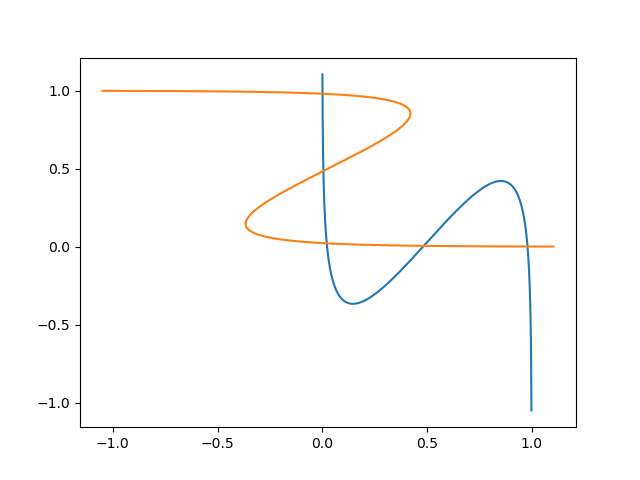

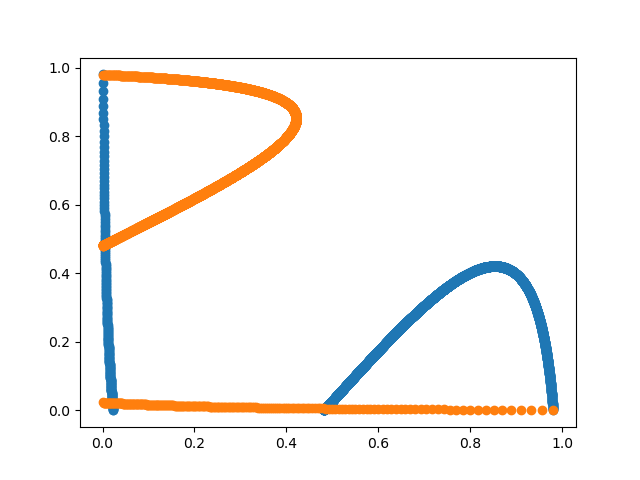

In [11]:
plt.figure()
plt.plot(x_domain, x2_nullcline)
plt.plot(x1_nullcline, x_domain)

plt.figure()
plt.scatter(x_domain[x2_null_mask], x2_nullcline[x2_null_mask])
plt.scatter(x1_nullcline[x1_null_mask], x_domain[x1_null_mask])

/tmp/ipykernel_27218/3670235871.py:16: RuntimeWarning: invalid value encountered in divide
  M = Y / (Y + X)


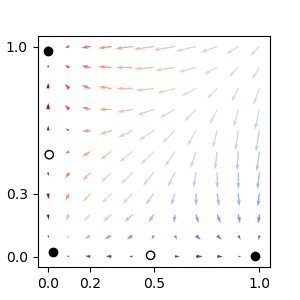

In [12]:
# full phase diagram (with lower->upper units connected)
n_X = 11
n_Y = 11
X_pos = np.linspace(0, 1, n_X)
Y_pos = np.linspace(0, 1, n_Y)
X, Y = np.meshgrid(X_pos, Y_pos)

U = np.zeros((n_X, n_Y))
V = np.zeros((n_X, n_Y))
for x1_idx, x1 in enumerate(X_pos):
    for x0_idx, x0 in enumerate(Y_pos):
        x = np.array([x0, x1, bottom_layer_fixed_points[0], bottom_layer_fixed_points[1]])
        velocity = dxdt_v2(x, w, inj_excite=I)
        U[x0_idx, x1_idx] = velocity[1]
        V[x0_idx, x1_idx] = velocity[0]
M = Y / (Y + X)

fig, ax = plt.subplots(1, 1, figsize=(3, 3))
q = ax.quiver(X, Y, U, V, M, cmap='coolwarm')
ax.scatter(fixed_pts[stable_mask, 0],
           fixed_pts[stable_mask, 1],
           marker='o', c='k')
ax.scatter(fixed_pts[stable_mask == False, 0],
           fixed_pts[stable_mask == False, 1],
           marker='o', fc='none', ec='k')
ax.set_xticks([0, 0.2, 0.5, 1])
ax.set_yticks([0, 0.3, 1])

# plot nullclines
# xlim = ax.get_xlim()
# ylim = ax.get_ylim()
# ax.plot(x_domain, x2_nullcline, c='k')
# ax.plot(x1_nullcline, x_domain, c='k')
# ax.set_xlim([-0.4, xlim[1]])
# ax.set_ylim([-0.4, ylim[1]])

In [13]:
fig.savefig('full_phase_diagram.pdf')

In [14]:
# segment response into rise and decay time windows for distinctive plotting
# of trajectory in phase space
low_I = np.min(inj_excite)
decay_idxs = np.nonzero(inj_excite[:, 0] == low_I)[0]
new_win_idxs = np.nonzero(np.diff(decay_idxs) > 1)[0] + 1

decay_windows = list()
rise_windows = list()
start_idx = 1
# NB: for curve continuity, each window starts at the end-point of the prior
# window
for new_win_idx in new_win_idxs:
    # add each window that proceeds a period of injected excitation
    decay_begin = decay_idxs[start_idx]
    decay_end = decay_idxs[new_win_idx - 1] + 1
    decay_windows.append(np.arange(decay_begin - 1, decay_end))
    rise_begin = decay_idxs[new_win_idx - 1] + 1
    rise_end = decay_idxs[new_win_idx]
    rise_windows.append(np.arange(rise_begin - 1, rise_end))
    start_idx = new_win_idx
# add final window up until the end of simulation
decay_windows.append(decay_idxs[start_idx:-1])

/tmp/ipykernel_27218/1770418803.py:17: RuntimeWarning: invalid value encountered in divide
  M = Y / (Y + X)


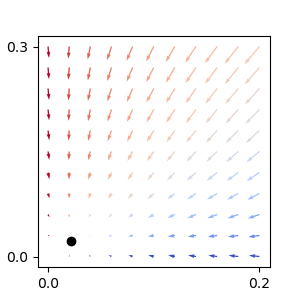

In [16]:
# snapshot phase diagram overlayed with simulated trajectory (with lower->upper
# units connected)
n_X = 11
n_Y = 11
X_pos = np.linspace(0, 0.2, n_X)
Y_pos = np.linspace(0, 0.3, n_Y)
X, Y = np.meshgrid(X_pos, Y_pos)

U = np.zeros((n_X, n_Y))
V = np.zeros((n_X, n_Y))
for x1_idx, x1 in enumerate(X_pos):
    for x0_idx, x0 in enumerate(Y_pos):
        x = np.array([x0, x1, bottom_layer_fixed_points[0], bottom_layer_fixed_points[1]])
        velocity = dxdt_v2(x, w, inj_excite=I)
        U[x0_idx, x1_idx] = velocity[1]
        V[x0_idx, x1_idx] = velocity[0]
M = Y / (Y + X)

fig, ax = plt.subplots(1, 1, figsize=(3, 3))
q = ax.quiver(X, Y, U, V, M, cmap='coolwarm')
# q = ax.quiver(X, Y, U, V)
# ax.streamplot(X, Y, U, V)
# ax.plot(x_negdev_L6[:, 1], x_negdev_L6[:, 0], 'k')
for decay_win in decay_windows:
    ax.plot(x_negdev_L6[decay_win, 1], x_negdev_L6[decay_win, 0], 'k-')
for rise_win in rise_windows:
    ax.plot(x_negdev_L6[rise_win, 1], x_negdev_L6[rise_win, 0], 'k:')
ax.scatter(fixed_pts[2, 0], fixed_pts[2, 1], marker='o', c='k')
ax.set_xticks([0, 0.2])
ax.set_yticks([0, 0.3])

In [17]:
fig.savefig('sim_connected_phase_diagram.pdf')

In [18]:
# for collection of coordinates of stable fixed points
attractors_discon = np.zeros((3, 2))

In [23]:
# find fixed points
I = 0.01 * np.ones((4,))

n_dim = 4
w_discon_L2 = w.copy()
w_discon_L2[n_dim // 2:, :n_dim // 2] = 0

def func_roots(x):
    x = np.array(x)  # convert to array if not one already
    return (dxdt_v2(x, w_discon_L2, inj_excite=I, thresh=thresh, thresh_2=thresh_2,
                    steepness=steepness, steepness_2=steepness_2),
            jacobian(x, w_discon_L2, inj_excite=I, tau=tau, tau_2=tau_2,
                     thresh=thresh, thresh_2=thresh_2,
                     steepness=steepness, steepness_2=steepness_2))

# plot Jacobian over mulitple values of x_0 -> look for roots visually
# domain = np.linspace(0, 1, 100)
# J_0 = list()
# for x_0 in domain:
#     J_0.append(func_roots(x_0))
# plt.figure()
# plt.plot(domain, J_0)

# find roots numerically
sol_discon = optimize.root(func_roots, x0=[0.5, 0.5, 0.5, 0.5], method='hybr',
                           tol=1e-10, jac=True)
attractors_discon[0, :] = sol_discon.x[:2]
bottom_layer_fixed_points = sol_discon.x[2:]
print(sol_discon.x, sol_discon.nfev, sol_discon.message)

[0.02178045 0.02178045 0.00064235 0.00064235] 12 The solution converged.


In [24]:
# find fixed points
I = 0.01 * np.ones((4,))

n_dim = 4
w_discon_L2 = w.copy()
w_discon_L2[n_dim // 2:, :n_dim // 2] = 0

def func_roots(x):
    x = np.array(x)  # convert to array if not one already
    return (dxdt_v2(x, w_discon_L2, inj_excite=I, thresh=thresh, thresh_2=thresh_2,
                    steepness=steepness, steepness_2=steepness_2),
            jacobian(x, w_discon_L2, inj_excite=I, tau=tau, tau_2=tau_2,
                     thresh=thresh, thresh_2=thresh_2,
                     steepness=steepness, steepness_2=steepness_2))

# plot Jacobian over mulitple values of x_0 -> look for roots visually
# domain = np.linspace(0, 1, 100)
# J_0 = list()
# for x_0 in domain:
#     J_0.append(func_roots(x_0))
# plt.figure()
# plt.plot(domain, J_0)

# find roots numerically
sol_discon = optimize.root(func_roots, x0=[0.1, 0.9, 0.5, 0.5], method='hybr',
                           tol=1e-10, jac=True)
attractors_discon[1, :] = sol_discon.x[:2]
attractors_discon[2, :] = sol_discon.x[1::-1]
print(sol_discon.x, sol_discon.nfev, sol_discon.message)

[1.40917789e-03 9.80557165e-01 6.42347265e-04 6.42347265e-04] 8 The solution converged.


In [25]:
# find intersection points of nullclines: these are the analytic fixed points (stable and unstable)
def func_roots(vars):
    x1, x2 = vars
    
    # x2 nullcline
    eq1 = -x1 + 1 / w[0, 1] * (sigmoid_inverse(x2, thresh, steepness) - w[1, 1] * x2 - inj_excite_baseline)
    
    # x1 nullcline
    eq2 = -x2 + 1 / w[1, 0] * (sigmoid_inverse(x1, thresh, steepness) - w[0, 0] * x1 - inj_excite_baseline)
    return [eq1, eq2]

# find roots numerically
start_pts = [[0.001, 0.99],
             [0.01, 0.50],
             [0.01, 0.01],
             [0.50, 0.01],
             [0.99, 0.001]]
# mask for stable fixed pts assuming convergence near start pts
stable_mask = np.array([True, False, True, False, True])
fixed_pts = np.zeros_like(start_pts)
for idx, start_pt in enumerate(start_pts):
    sol = optimize.root(func_roots, x0=start_pt, method='hybr', tol=1e-10)
    fixed_pts[idx] = sol.x
    print(sol.x, sol.nfev, sol.message)

[0.00140918 0.98055717] 12 The solution converged.
[0.00556808 0.48376283] 11 The solution converged.
[0.02178045 0.02178045] 10 The solution converged.
[0.48376283 0.00556808] 11 The solution converged.
[0.98055717 0.00140918] 12 The solution converged.


/tmp/ipykernel_27218/2369949014.py:17: RuntimeWarning: invalid value encountered in divide
  M = Y / (Y + X)


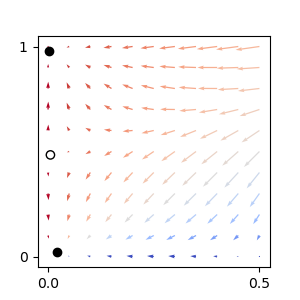

In [26]:
# snapshot phase diagram overlayed with simulated trajectory (with lower->upper
# units disconnected)
n_X = 11
n_Y = 11
X_pos = np.linspace(0, 0.5, n_X)
Y_pos = np.linspace(0, 1, n_Y)
X, Y = np.meshgrid(X_pos, Y_pos)

U = np.zeros((n_X, n_Y))
V = np.zeros((n_X, n_Y))
for x1_idx, x1 in enumerate(X_pos):
    for x0_idx, x0 in enumerate(Y_pos):
        x = np.array([x0, x1, bottom_layer_fixed_points[0], bottom_layer_fixed_points[1]])
        velocity = dxdt_v2(x, w_discon_L2, inj_excite=I)
        U[x0_idx, x1_idx] = velocity[1]
        V[x0_idx, x1_idx] = velocity[0]
M = Y / (Y + X)

fig, ax = plt.subplots(1, 1, figsize=(3, 3))
q = ax.quiver(X, Y, U, V, M, cmap='coolwarm')
# ax.streamplot(X, Y, U, V)
# ax.plot(x_negdev_noL6[:, 1], x_negdev_noL6[:, 0], 'k')
for decay_win in decay_windows:
    ax.plot(x_negdev_noL6[decay_win, 1], x_negdev_noL6[decay_win, 0], 'k-')
for rise_win in rise_windows:
    ax.plot(x_negdev_noL6[rise_win, 1], x_negdev_noL6[rise_win, 0], 'k:')
ax.scatter(fixed_pts[[0, 2], 0], fixed_pts[[0, 2], 1], marker='o', c='k')
ax.scatter(fixed_pts[1, 0], fixed_pts[1, 1], marker='o', fc='none', ec='k')
ax.set_xticks([0, 0.5])
ax.set_yticks([0, 1])

In [27]:
fig.savefig('sim_disconnected_phase_diagram.pdf')